In [10]:
import pandas as pd
import os
import requests
import json
import sys

In [11]:
import wow_final.py

The following information is collected for statistical purposes and
will not be published, distributed or otherwise sold to any third party.

You must be a United States resident between the ages of 18-50 to complete
this survey. A United States resident is anyone who resides within the
50 States.

This survey consists of 20 questions. The estimated time to complete this survey is 10 minutes.
Please take your time reading and answering each question. You will not be able to change your answers.

What is your first name?
Please enter your name: mark
Welcome Mark
Are you a resident of the United States?
[Please enter Yes or No]: y
Great! You are a United States resident.
Are you able to complete this survey in English?
[Please enter Yes or No]: y
Great! We will continue in English.
Please select your gender:
[Please enter Male, Female or Other]: male
You entered Male
Please enter your age: [Age must be between 18 and 50]
Please enter your age: 34
Great! Your age is 34, which is within th

OSError: [Errno 30] Read-only file system: '/Data.wowDataFinal.csv'

# Using Python to conduct a survey - Yusuf Bolden and Kevin Campfield

For this project we are taking users' inputs to a survey and adding them to a dataframe. This type of survey can serve many real-world purposes such as aiding city or school officials assessing a districts' priority recipients for emergency resources and the method by which resources would reach these residents in the fastest manner. 

# Explanation of the code

The following libraries were imported:

"import pandas as pd" - used import the vast toolkit that provides numerous tools for data analysis such as data structure and operations for manipulating numerical tables and times series. Pandas is abbreviated as pd as a matter of ease in typing.

"import os" - used to import the miscellaneous operating system interfaces from the os library

"import requests" - allows HTTP requests to be made.

"import json" - JSON is used to covert the python dictionary into a json string that can be written to a file

"import sys" - SYS is a library of system-specific parameters and functions.

# How the user inputs are stored in the CSV

The survey consists of twenty (20) questions with user inputs varying from a yes/no answers to entering a specific number. Each user response is stored in a excel spreadsheet (csv) at the completion of the survey. The code sets a variable and assigns the desired input into the CSV. For instance, a 'male', 'female' or 'other' answer to the gender question is set to enter 'm', 'f' or 'o' into the CSV. Each acceptable response is repeated back to the user to acknowlege receipt of user's input. Upon successful completion of the survey, the user is thanked for participation.

# Using code to validate user inputs

# Checking Yes/No inputs

After the intial question, which asks the user to input the user's name, each subsequent question is contolled by a while loop and within each while loop are if/else statements that contol the output (response to user). The first two (2) questions contain a while loop within the while loop that gives the user two (2) attemps to correctly answer the qualifying question. Should user fail to qualify on either question, the system will exit via sys.exit as shown below in Example 1. When a user's input is accepted, the While loop breaks and moves on to the next question.



In [2]:
# EXAMPLE 1

#Question 2
while True:
    USResident = input("Are you a resident of the United States?\n[Please enter Yes or No]: ")
    if USResident in ["Yes", "YES", "y", "Y", "yes"]:
        print("Great! You are a United States resident.")
        break
    elif USResident in ["No", "NO", "n", "N", "no"]:
        print("Sorry! This survey is only for United States residents.")
        while True:
            USResident = input("Are you a resident of the United States?\n[Please enter Yes or No]: ")
            if USResident in ["Yes", "YES", "y", "Y", "yes"]:
                print("Great! You are a United States Resident")
                break
            elif USResident in ["No", "NO", "n", "N", "no"]:
                sys.exit("Sorry! This survey is only for United States residents. Thanks for trying.")
            else:
                print("Sorry! Invalid entry! Please try again")
        break
    else:
        print("Sorry! Invalid entry! Please try again")


Are you a resident of the United States?
[Please enter Yes or No]: y
Great! You are a United States resident.


As can be seen, the user answered 'no' twice and the system exited. The only possible answer to complete the survey is yes, which the user can enter as "Yes", "YES", "y", "Y", "yes" as seen in the code above in Example 1. Any user input that does not appear in the acceptable ranges within the if[] or elif[] is automatically sent to the 'else' and the user is informed of the invalid entry. The sys.exit parameter is only used on the 2nd (US resident) and 3rd (able to complete survey in English) questions. Through additional coding, a 'no' answer to English could possibly offer the user the survey in additional languages.

# Validating number inputs

There are 5 questions which require the users to input numbers. To ensure the users' input is a valid number (not a negative number or containing letters, symbols or decimals), we have utlized the function displayed in Example 2. This function is written at the top of code file and given the name 'inputNumber' and it applies to any questions that call that function. The function inputNumber checks that the user inputs an integer. Any acceptable answer is received and the code will break to continue to the next question. Any input that is not an integer returns the error message. The code in Question 4 also returns an error message if the user's input age is not within the range 18-50 inclusive of 18 and 50.



In [3]:
# EXAMPLE 2
def inputNumber(message):
    while True:
        try:
            userInput = int(input(message))
            break
        except ValueError :
            print("Invalid entry! Please try again.")

    return userInput

# Question 4
while True:
    age = inputNumber("Please enter your age: [Age must be a number between 18 and 50]\nPlease enter your age: ")
    if age >= 18 and age <= 50:
        print(f"Great! Your entered your age as {age}, which qualifies for this survey.")
        break
    else:
        print("Invalid entry! Please try again.")

Please enter your age: [Age must be a number between 18 and 50]
Please enter your age: 34
Great! Your entered your age as 34, which qualifies for this survey.


# Validating user's zipcode

The user is required to enter the zipcode of residence. Although the zipcode will be an integer, the inputNumber function is not called within this while loop. Instead, the while loop is written to check two things: 1) whether the zipcode is 5 digits in length and 2) if the zipcode is a valid United States zipcode. The zipcode length is checked with if len(zipcode) != 5, thus, if the zipcode length is not exactly 5 digits, the user will be prompted until a valid zipcode is enter. A valid zipcode is determined by calling accessing a api_url and will only be valid upon returning a response code of 200 which is accessed by the import requests above. The user will be greeted with the city, state and zipcode based on the user's input that is stored using datastore. The variables input_city and input_state are generated from the json.loads(response.content) that the requests.get returns.


In [4]:
# Example 3

API_KEY = "JlfALuS6idZcTt2Cn5Z3FkUEosJSRkpfNnMV58w6PD3T971F0jUPuw087c0orm37"

while True:
  zipcode = input("What is your zip code?\nPlease enter your 5-digit zip code: ")
  if len(zipcode) != 5:
      print('Invalid entry! Please try again.')
      continue

  api_url = "https://www.zipcodeapi.com/rest/" + API_KEY + "/info.json/" + zipcode + "/degrees"

  response = requests.get(api_url)
  if response.status_code == 200:
    break
  print("Invalid entry! Please try again.")

datastore = json.loads(response.content)

input_city = datastore['city']
input_state = datastore['state']

print(f"Great! You live in {input_city}, {input_state} and your zipcode is {zipcode}.")

What is your zip code?
Please enter your 5-digit zip code: 07307
Great! You live in Jersey City, NJ and your zipcode is 07307.


# Coding to output proper is/are response

When probing for number of chidren under 18 in the household, the code will accept any integer. However, the response to user will differ based on the number. If the user indicates the number of chidren is 1, the response to user will be 'You entered there is 1 child. A response of any integer other than 1 will return the response of 'You entered there are n children'. In example 4, the user inputs the number of children. The code checks the input to determine: 1) if the input is valid then proceeds to check the number to determine whether you respond using 'child or children' to correspond with 'is or are'.



In [5]:
# Example 4

while True:
    number_of_children_in_household = inputNumber("How many children under 18 years old reside in your household?\n[Please enter a number]: ")
    if number_of_children_in_household < 0:
        print('Invalid entry! Please try again.')
    else:
        if number_of_children_in_household == 1:
            child_or_children = 'child'
            is_or_are = 'is'
        else:
            child_or_children = 'children'
            is_or_are = 'are'
        print(f"You entered there {is_or_are} {number_of_children_in_household} {child_or_children} under 18 years old in your household.")
        break



How many children under 18 years old reside in your household?
[Please enter a number]: 2
You entered there are 2 children under 18 years old in your household.


# Skipping a non-applicable question

The follow-up question to number of children in the household asks whether the other parent resides in the household. Since some users will indicate 0 children in the household, it would be unnecessary to ask if the other parent resides in the household as that question would be non-applicable. Therefore, Example 5 shows how the code compares users' input to number of children in household. If number of children in household compares to 0, the other parent in household is marked as 'NaN' in the CSV and the question is skipped. Otherwise, if number of children is 1 or greater, user is then probed for other parent in household. The code is written to where a '0' input to number of children in the household will skip any further questions relating to children in the household.

In [6]:
# Example 5 

while True:
    if number_of_children_in_household == 0:
        other_parent_in_household = "NaN"
        break
    other_parent_in_household = input(f"Does the other parent of your {child_or_children} reside in the household?\n[Enter yes or no]: ")
    if other_parent_in_household in ["Yes", "YES", "y", "Y", "yes"]:
        other_parent_in_household = 'y'
        print("You entered the other parent DOES live in the household")
        break
    elif other_parent_in_household in ["No", "NO", "n", "no"]:
        other_parent_in_household = 'n'
        print("You entered the other parent DOES NOT live in the household")
        break
    else:
        print("Invalid entry! Please try again.")
        break

Does the other parent of your children reside in the household?
[Enter yes or no]: yes
You entered the other parent DOES live in the household


# Tenary Operator

In checking to ensure the user's total household number meets the minimum expected value (user + number of children + other parent if applicable), the numbers cannot be added using the current inputs. The number of children is a number, other parent in household is answered using a string 'yes' or 'no' and there is no count for the user. Thus, a number and a string cannot be added. Therefore, a tenary operator (value_if_true if condition else value_if_false) is used to convert the string 'yes' or 'no' answer to a number. This tenary operator is utilize in calculating the minimum expected value for total household size as (number_of_children_in_household + (1 if other_parent_in_household == 'y' else 0) + 1) where (1 if other_parent_in_household == 'y' else 0) translates as if the user answers yes to other_parent_in_household, then add 1, otherwise add 0. The + 1 at the end of the equation represents the user. Supposing the user indicates 2 children in the household and the other parent does not reside in the household, the minimum acceptable household size is (2 + 0 + 1) = 3. If the user inputs a number less than 3, an error message is generated and the user will have to input at least the minimum expected number.

In [7]:
# Example 6

while True:
    number_of_children_in_household = inputNumber("How many children under 18 years old reside in your household?\n[Please enter a number]: ")
    if number_of_children_in_household < 0:
        print('Invalid entry! Please try again.')
    else:
        if number_of_children_in_household == 1:
            child_or_children = 'child'
            is_or_are = 'is'
        else:
            child_or_children = 'children'
            is_or_are = 'are'
        print(f"You entered there {is_or_are} {number_of_children_in_household} {child_or_children} under 18 years old in your household.")
        break

while True:
    if number_of_children_in_household == 0:
        other_parent_in_household = "NaN"
        break
    other_parent_in_household = input(f"Does the other parent of your {child_or_children} reside in the household?\n[Enter yes or no]: ")
    if other_parent_in_household in ["Yes", "YES", "y", "Y", "yes"]:
        other_parent_in_household = 'y'
        print("You entered the other parent DOES live in the household")
        break
    elif other_parent_in_household in ["No", "NO", "n", "no"]:
        other_parent_in_household = 'n'
        print("You entered the other parent DOES NOT live in the household")
        break
    else:
        print("Invalid entry! Please try again.")
        break

while True:
    minimum_expected_total_household_size = (number_of_children_in_household + (1 if other_parent_in_household == 'y' else 0) + 1)
    total_household_size = inputNumber("Including yourself, how many total persons reside in your household?\n[Please enter a number]: ")
    if total_household_size < 0:
        print("Invalid entry! Please try again.")
    elif total_household_size == 0:
        print("Invalid entry! Total household size must be greater than or equal to 1.")
    elif total_household_size < minimum_expected_total_household_size:
        print(f"Invalid entry! You entered {total_household_size} which is less than your minimum total expected household size of {minimum_expected_total_household_size}.")
    else:
        print(f"Your entered your total_household_size is {total_household_size}.")
        break

How many children under 18 years old reside in your household?
[Please enter a number]: 2
You entered there are 2 children under 18 years old in your household.
Does the other parent of your children reside in the household?
[Enter yes or no]: yes
You entered the other parent DOES live in the household
Including yourself, how many total persons reside in your household?
[Please enter a number]: 4
Your entered your total_household_size is 4.


# Writing to the CSV

# Naming the columns

The name of the CSV file is defined at the top of the code as wowDataFinal = 'wowDataFinal.csv'. At the completion of the survey, the user's answers are then stored in variables as it appears in Example 7. the 's' represent a column in the CSV file that is created using the pd.Series.



In [8]:
# Example 7 (NOTE: this cell cannot be run as all the variables are undefined without the remainder of the code)

s = pd.Series(dtype=str)

s['first_name'] = name
s['gender'] = gender
s['age'] = age
s['race'] = race
s['city'] = input_city
s['state'] = input_state
s['zipcode'] = zipcode
s['number_of_children_in_household'] = number_of_children_in_household
s['other_parent_in_household'] = other_parent_in_household
s['total_household_size'] = total_household_size
s['high_school_or_higher'] = high_school_or_higher
s['employed'] = employed
s['personal_income'] = personal_income
s['homeowner'] = homeowner
s['transportation'] = transportation
s['home_internet_access'] = home_internet_access
s['incarceration'] = incarceration
s['child_incarceration'] = child_incarceration
s['victim_of_crime'] = victim_of_crime
s['child_victim_of_crime'] = child_victim_of_crime
s['stopped_and_frisked'] = stopped_and_frisked

NameError: name 'name' is not defined

# Try/Except block to create the CSV file

Example 8 shows try/except block. inside the 'try' loop, the code looks in the code folder for a file named 'wowDataFinal'. If the file is found, the code appends to that file using df = df.append. If the 'wowDataFinal' file is not found, the except block is activated which will create a CSV file. The code will then take the stored data, create a CSV file named 'wowDataFinal' and write to the file because the mode='w' instructs the code to write to stored data to the file.

In [27]:
# Example 8

try:
    df = pd.read_csv(wowDataFinal)
except:
    df = pd.DataFrame()

df = df.append(s, ignore_index=True)

df.to_csv(wowDataFinal, mode='w', index=False)

NameError: name 'wowDataFinal' is not defined

# Data Analysis





# Reading the data

In [12]:
df = pd.read_csv('wowDataFinal.csv', index_col=0)
# This will bring the CSV file into jupyter notebook

In [13]:
df
# this will display the entire dataframe

,gender,age,race,city,state,zipcode,number_of_children_in_household,other_parent_in_household,total_household_size,high_school_or_higher,employed,personal_income,homeowner,transportation,home_internet_access,incarceration,child_incarceration,victim_of_crime,child_victim_of_crime,stopped_and_frisked
first_name,,,,,,,,,,,,,,,,,,,,
steve,male,28,white,Queens,NY,11101,1,no,2,y,y,20001-35000,n,private,y,n,n,y,yes,no
karen,female,36,white,Brooklyn,NY,11216,3,yes,5,y,y,35001-50000,y,public,y,n,y,y,yes,no
brian,male,24,black,Bronx,NY,10456,2,yes,4,n,n,less_than_15000,n,public,y,y,n,n,no,yes
michael,other,19,black,Staten Island,NY,10314,0,no,1,y,n,less_than_15000,n,public,y,y,n,y,no,yes
larry,male,30,black,Queens,NY,11355,0,no,1,y,y,15000-20000,n,public,y,y,n,n,no,yes
tamika,other,22,mixed,Bronx,NY,10460,0,no,1,y,y,less_than_15000,n,public,y,y,n,n,yes,yes
sharon,female,21,black,Brooklyn,NY,11236,1,no,1,y,y,less_than_15000,n,public,y,n,n,n,yes,yes
kimberly,female,29,black,Manhattan,NY,10028,5,no,6,y,y,15000-20000,n,public,y,n,n,y,yes,no
tawanda,female,26,mixed,Manhattan,NY,10013,2,no,3,y,y,15000-20000,n,public,y,n,n,n,yes,no


In [14]:
df.head()
# shows the first 5 rows

,gender,age,race,city,state,zipcode,number_of_children_in_household,other_parent_in_household,total_household_size,high_school_or_higher,employed,personal_income,homeowner,transportation,home_internet_access,incarceration,child_incarceration,victim_of_crime,child_victim_of_crime,stopped_and_frisked
first_name,,,,,,,,,,,,,,,,,,,,
steve,male,28,white,Queens,NY,11101,1,no,2,y,y,20001-35000,n,private,y,n,n,y,yes,no
karen,female,36,white,Brooklyn,NY,11216,3,yes,5,y,y,35001-50000,y,public,y,n,y,y,yes,no
brian,male,24,black,Bronx,NY,10456,2,yes,4,n,n,less_than_15000,n,public,y,y,n,n,no,yes
michael,other,19,black,Staten Island,NY,10314,0,no,1,y,n,less_than_15000,n,public,y,y,n,y,no,yes
larry,male,30,black,Queens,NY,11355,0,no,1,y,y,15000-20000,n,public,y,y,n,n,no,yes


In [15]:
df.tail()
# shows the last 5 rows

,gender,age,race,city,state,zipcode,number_of_children_in_household,other_parent_in_household,total_household_size,high_school_or_higher,employed,personal_income,homeowner,transportation,home_internet_access,incarceration,child_incarceration,victim_of_crime,child_victim_of_crime,stopped_and_frisked
first_name,,,,,,,,,,,,,,,,,,,,
kimberly,female,33,black,Dry Prong,LA,71423,3,n,5,n,n,2,n,0,y,y,y,y,y,n
keith,male,33,black,Bland,VA,24315,2,y,4,y,y,4,y,1,y,n,n,y,n,n
mary,female,48,white,Barstow,CA,92312,3,y,5,y,n,1,y,1,y,n,n,y,y,n
Jerry,male,33,native american,Holland,KY,42153,2,n,3,y,n,3,y,1,y,n,n,y,n,n
Keith,m,34,black,Baltimore,MD,21239,2,y,4,y,y,37500,y,private,y,y,y,y,y,y


In [16]:
df.shape
# shows the total number of rows, columns
# each row represents the user's inputs
# each column corresponds to a question in the survey


(32, 20)

# Plotting data with Seaborn

In [33]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




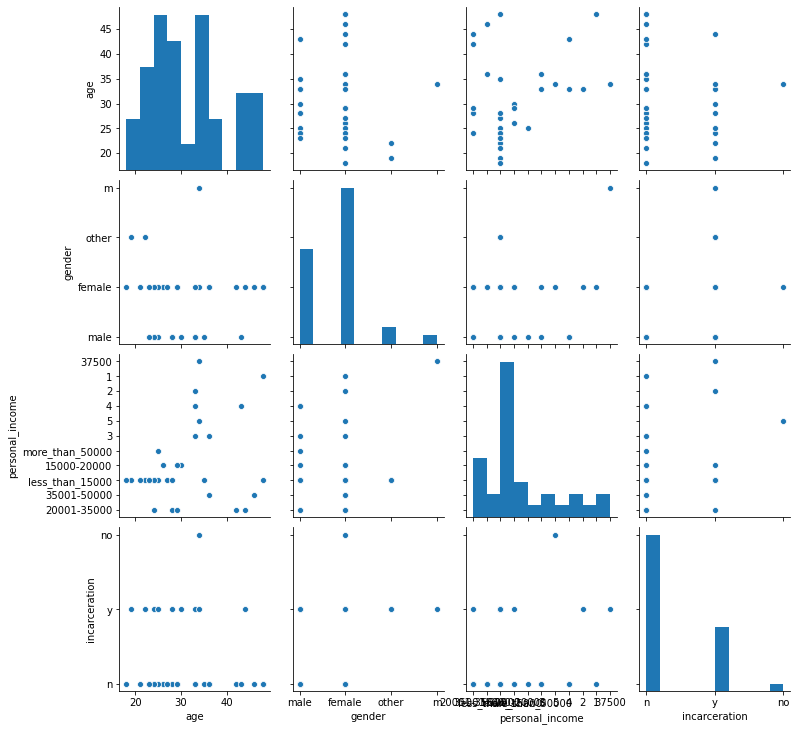

In [18]:
sns.pairplot(data = df, vars = ['age', 'gender', 'personal_income', 'incarceration'])
# Plotting to inspect for any correlation to age, personal income and incarceration

As can be seen in the Seaborn plot, the data sample size is not large enough to get clearly defined data.

# Using a Matplotlib heatmap to analyze the data

In [19]:
correlations = df.corr()

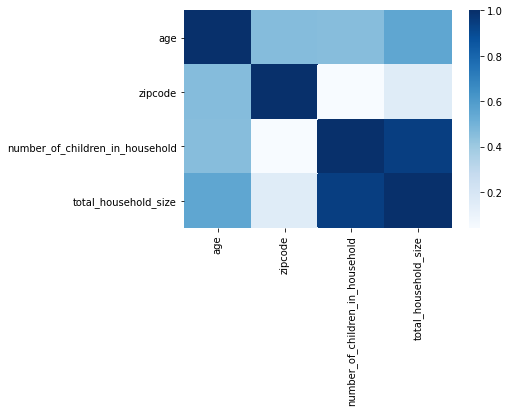

In [34]:
sns.heatmap(correlations, cmap ='Blues')

Again, there is not enough data to generate clearly defined data.

# Running a linear model

In [38]:
sns.lmplot(data = df, x = 'total_household_size', y = 'incarceration')

KeyError: "None of [Index(['incarceration', 'total_household_size'], dtype='object')] are in the [columns]"

The linear model is easier to read. With the exception of a few outliers, the sample data indicates that most responders have a personal income less than $50,000 with the average total household size falling between 3 and 5.

# Running linear regression

In [39]:
from statsmodels import regression
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

In [40]:
x = df [['personal_income', 'homeowner']]
y = df

KeyError: "None of [Index(['personal_income', 'homeowner'], dtype='object')] are in the [columns]"

In [41]:
# add a constant
x['intercept'] = 1
x.head()

<ipython-input-41-4b892f54085e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['intercept'] = 1


,personal_income,homeowner,intercept
first_name,,,
steve,20001-35000,n,1
karen,35001-50000,y,1
brian,less_than_15000,n,1
michael,less_than_15000,n,1
larry,15000-20000,n,1


# Summary

In summary, Python has many uses. This example sought to collect data from user inputs, store and then write the data to a CSV. The CSV can be imported in Jupyter Notebook to analyze the data with Seaborn plotting, linear modeling and linear regression. In this example, the dataset was too small to generate the desired results; however, proof on concept was obtained to show viability of this product.